## Observations and Insights 

In [279]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from functools import reduce
import dateutil
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mergy_mouse_dup = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mergy_mouse_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [280]:
# Checking the number of mice.
mice_count = mergy_mouse_dup['Mouse ID'].nunique()
mice_count

249

In [281]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# mouse_time = mergy_mouse.groupby(['Mouse ID', 'Timepoint']).size().sort_values(ascending=False)
# mouse_time.head(10)

# Count duplicate on certain columns
mergy_mouse_dup.duplicated(subset=['Mouse ID', 'Timepoint']).sum()





5

In [282]:
# Optional: Get all the data for the duplicate mouse ID. 

mergy_mouse_dup.loc[mergy_mouse_dup.duplicated(subset=['Mouse ID', 'Timepoint']), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [283]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mergy_mouse = mergy_mouse_dup.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
mergy_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [284]:
# Checking the number of mice in the clean DataFrame.
mice_count = mergy_mouse['Mouse ID'].nunique()
mice_count

249

## Summary Statistics

In [285]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# mergy_mouse.columns

# mean
mean_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').mean(),2)
mean_mergy_mouse = mean_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume (mm3)"})
mean_mergy_mouse

# median

median_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').median(),2)
median_mergy_mouse = median_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume (mm3)"})
median_mergy_mouse

# variance
var_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').var(),2)
var_mergy_mouse = var_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Variance Tumor Volume (mm3)"})
var_mergy_mouse

# StdDEV
stdv_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').std(),2)
stdv_mergy_mouse = stdv_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"Std.Dev Tumor Volume (mm3)"})
stdv_mergy_mouse

# SEM
sem_mergy_mouse = round(mergy_mouse[['Tumor Volume (mm3)', 'Drug Regimen']].groupby('Drug Regimen').sem(),2)
sem_mergy_mouse = sem_mergy_mouse.rename(columns={"Tumor Volume (mm3)":"SEM Tumor Volume (mm3)"})
sem_mergy_mouse

# data = mean_mergy_mouse['Mean Tumor Volume (mm3)']
# sem(data)

# Assemble the resulting series into a single summary dataframe.
# compile the list of dataframes you want to merge
data_frames = [mean_mergy_mouse, median_mergy_mouse, var_mergy_mouse, stdv_mergy_mouse, sem_mergy_mouse]
sum_mergy_mouse = reduce(lambda  left,right: pd.merge(left,right,on=['Drug Regimen'],
                                            how='outer'), data_frames)

sum_mergy_mouse




,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std.Dev Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [286]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_line = round((mergy_mouse.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
         .agg([('Mean Tumor Volume (mm3)','mean'),('Median Tumor Volume (mm3)','median'),
         ('Variance Tumor Volume (mm3)','var'),('Std.Dev Tumor Volume (mm3)','std'),
         ('SEM Tumor Volume (mm3)','sem')])),2)
single_line

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std.Dev Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [300]:
#Holder Cell to keep mergy_mouse data close ***DELETE When bar
# graph is done****

# mergy_mouse.plot.bar(x='Drug Regimen', y='Timepoint')

# mean
bar1_mergy_mouse = mergy_mouse[[('Timepoint'), 'Drug Regimen']].groupby("Drug Regimen").sum()
bar1_mergy_mouse.reset_index(inplace=True)
bar1_mergy_mouse


,Drug Regimen,Timepoint
0,Capomulin,4960
1,Ceftamin,3515
2,Infubinol,3235
3,Ketapril,3705
4,Naftisol,3650
5,Placebo,3380
6,Propriva,2665
7,Ramicane,4885
8,Stelasyn,3480
9,Zoniferol,3525


Text(0, 0.5, 'Sum of Timepoints')

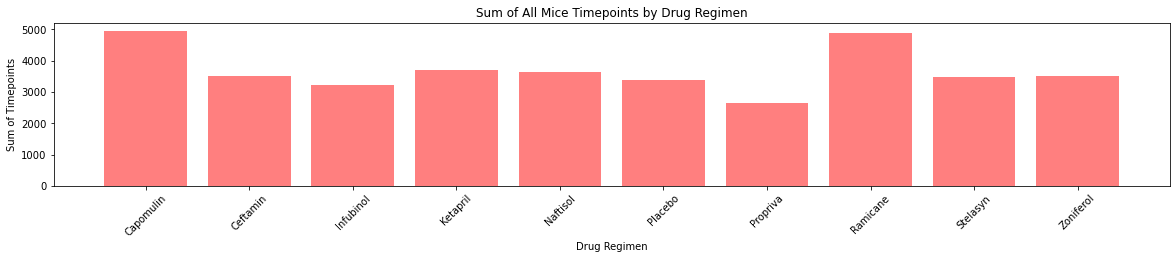

In [306]:
# Generate a bar plot showing the total number of timepoints 
# for all mice tested for each drug regimen using Pandas.

# Set x axis and tick locations
x_axis = np.arange(len(bar1_mergy_mouse))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, bar1_mergy_mouse["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, bar1_mergy_mouse["Drug Regimen"], rotation="45")

# Set a Title and labels
plt.title("Sum of All Mice Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sum of Timepoints")


In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
